In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [77]:
im = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_im.npy')
im480 = np.load('E:/polar/code/data/ir/entire/original_size/prepared/480_im.npy')
im128 = np.load('E:/polar/code/data/ir/entire/original_size/prepared/128_im.npy')
im64 = np.load('E:/polar/code/data/ir/entire/original_size/prepared/64_im.npy')
im32 = np.load('E:/polar/code/data/ir/entire/original_size/prepared/32_im.npy')

im = np.load('E:/polar/code/data/ir/entire/original_size/prepared/im256.npy')
ma = np.load('E:/polar/code/data/ir/entire/original_size/prepared/ma256.npy')
xtrain = np.load('E:/polar/code/data/ir/entire/original_size/prepared/imtrain256.npy')
ytrain = np.load('E:/polar/code/data/ir/entire/original_size/prepared/matrain256.npy')

In [81]:
print(np.max(im))

1.0


In [27]:
def normalize(x, order=2):
    """Normalizes a Numpy array.

    Args:
        x: Numpy array to normalize.
        axis: axis along which to normalize.
        order: Normalization order (e.g. `order=2` for L2 norm).

    Returns:
        A normalized copy of the array.
    """
    l2 = np.atleast_1d(np.linalg.norm(x, order))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)

In [70]:
def visualize_ir(img, colorbar='False', save_path=None):
    plt.imshow(img, cmap='cividis')

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        cv2.imwrite(save_path, img)

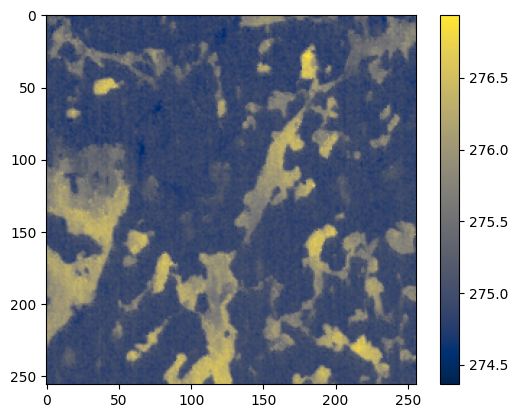

In [71]:
visualize_ir(im[0])

In [74]:
orig_shape = im.shape
print(orig_shape)

im_resh = im.reshape(-1,1)
print(im_resh.shape)

im_new = im_resh.reshape(orig_shape)
print(im_new.shape)


(32, 256, 256)
(2097152, 1)
(32, 256, 256)


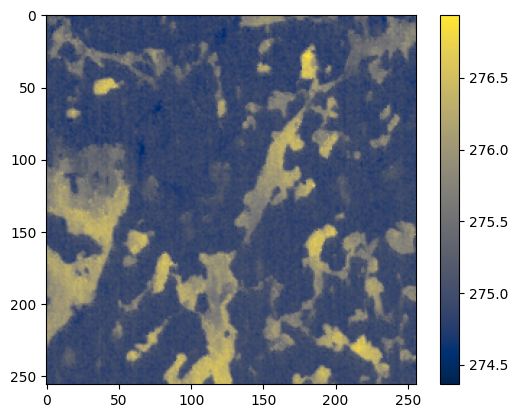

In [76]:
visualize_ir(im_new[0])

In [64]:
# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# load data
data = im128[1]
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(data)
# inverse transform
inverse = scaler.inverse_transform(normalized)

print(np.amax(inverse))
print(np.amin(inverse))
print(inverse.shape)

276.94067
274.52533
(128, 128)


In [54]:
im32 = im32.flatten()

j = normalize(im32, axis=0)
#k = normalize(im, axis=1)
#w = normalize(im, axis=2)
m = normalize(im, axis=-1)
print(np.amin(j))
print(np.amax(j))
#print(np.amin(k))
#print(np.amax(k))
#print(np.amin(w))
#print(np.amax(w))
print(np.amin(m))
print(np.amax(m))


0.00073322485
0.00074240315
0.0006874006
0.00069600524


In [51]:
im480 = im480.flatten()

j = normalize(im480, axis=0)
#k = normalize(im480, axis=1)
#w = normalize(im480, axis=2)
m = normalize(im480, axis=-1)
print(np.amin(j))
print(np.amax(j))
#print(np.amin(k))
#print(np.amax(k))
#print(np.amin(w))
#print(np.amax(w))
print(np.amin(m))
print(np.amax(m))

0.0007332248
0.0007424031
0.0007332248
0.0007424031


In [39]:
j = normalize(im32, axis=0)
k = normalize(im32, axis=1)
w = normalize(im32, axis=2)
m = normalize(im32, axis=-1)
print(np.amin(j))
print(np.amax(j))
print(np.amin(k))
print(np.amax(k))
print(np.amin(w))
print(np.amax(w))
print(np.amin(m))
print(np.amax(m))

0.023463892
0.023756232
0.17579143
0.17799126
0.17576219
0.17802624
0.17576219
0.17802624


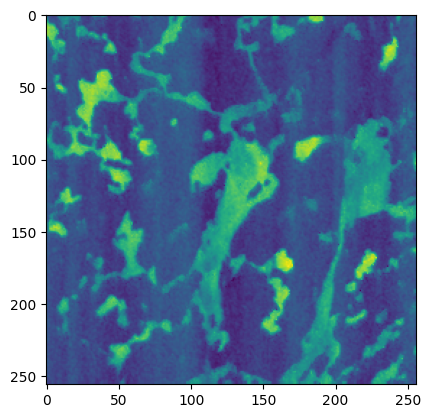

In [22]:
plt.imshow(xtrain[3,:,:,0])

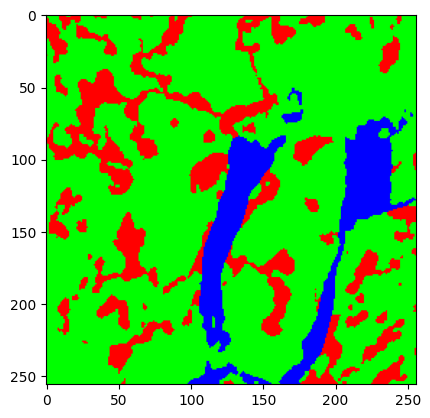

In [21]:
plt.imshow(ytrain[3])

In [82]:
from imagepre import train_imnet

Segmentation Models: using `keras` framework.


In [83]:
images = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_im.npy')
masks = np.load('E:/polar/code/data/ir/entire/original_size/prepared/256_ma.npy')

X_train, X_test, y_train, y_test, train_gen, val_gen = train_imnet(images, masks)

float32
Original im shape ... (32, 256, 256)
New im shape ... (32, 256, 256, 3)
Original masks shape ... (32, 256, 256)


NameError: name 'n_classes' is not defined

In [4]:
import netCDF4
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from utils.image_transform import crop_center_square, transform_color, resize_image
from patchify import patchify

############################################

ir_dir = 'E:/polar/code/data/flight9/IRdata_ATWAICE_processed_220718_142920.nc'
mask_dir = 'E:/polar/code/data/ir/entire/original_size/msks'

#### Convert netcdf data to numpy array ####
ds = netCDF4.Dataset(ir_dir)
imgs = ds.variables['Ts'][:]
timestamps = ds.variables['time'][:]

############## Training Data ###############
imgs_train = [imgs[2416],imgs[2380],imgs[2452],imgs[2468],imgs[2476],imgs[2708],imgs[3700],imgs[3884]]
tmp = []

for im in imgs_train:
    im = crop_center_square(im)
    tmp.append(im)

imgs_train = tmp

for idx, img in enumerate(imgs_train):
    plt.imsave('E:/polar/code/data/ir/entire/original_size/ims_raw_normalize/{}.png'.format(idx), img, cmap='gray', 
               vmin=273, vmax=277)
    
for idx, img in enumerate(imgs_train):
    plt.imsave('E:/polar/code/data/ir/entire/original_size/ims_raw_normalize{}.png'.format(idx), img, cmap='gray')

In [1]:
import netCDF4
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from utils.image_transform import crop_center_square, transform_color, resize_image
from patchify import patchify

In [7]:
for idx, img in enumerate(imgs_train):
    #np.clip(img, 273, 277)
    plt.imsave('E:/polar/code/data/ir/entire/original_size/ims_raw_normalize/{}.png'.format(idx), img, cmap='gray', 
               vmin=273, vmax=277)

87
63
73
85
76
81
60
99


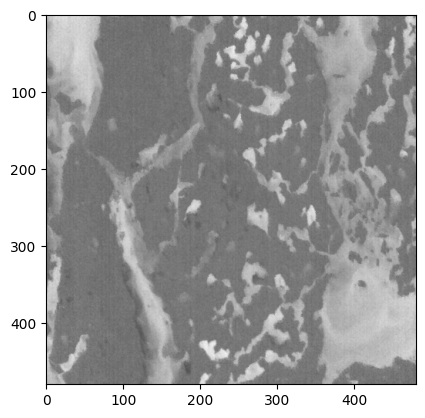

In [18]:
imgs_png_norm = []
save_path_norm = 'E:/polar/code/data/ir/entire/original_size/ims_raw_normalize/'


for im in os.listdir(save_path_norm):
    path = os.path.join(save_path_norm, im)
    im = cv2.imread(path, 0)
    im = crop_center_square(im)
    print(np.amin(im))

    imgs_png_norm.append(im)

plt.imshow(imgs_png_norm[4], cmap='gray', vmin=0, vmax=255)


imgs_raw_norm = np.array(imgs_png_norm)

# save normalized images as array
#np.save('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_im_norm.npy', imgs_raw_norm)

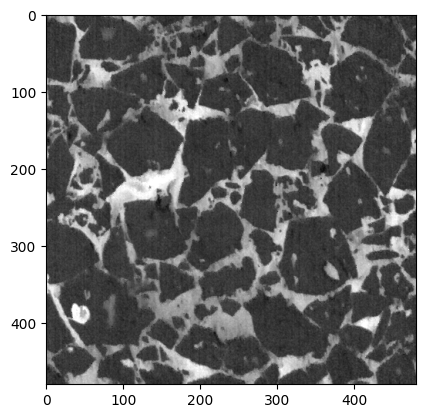

In [23]:
i = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_im_norm.npy')
m = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_ma.npy')

plt.imshow(i[7], cmap='gray')